In [169]:
import pandas as pd

In [170]:
# Read dataset from csv, without symbol ','
init_data = pd.read_csv('new_exc.csv', sep=",", names=['Top', 'Title', 'Year', 'Rating', 'Genre', 'Director',
                                                      'Country', 'Location', 'Budget'])

In [171]:
init_data.head()

,Top,Title,Year,Rating,Genre,Director,Country,Location,Budget
0,1,Vykoupení z věznice Shawshank,1994,"9,3",Drama,FrankDarabont,USA,"Sandy Point, St Croix, U S Virgin Islands","$25,000,000"
1,2,Kmotr,1972,"9,2","Crime,Drama",FrancisFordCoppola,USA,"NY Eye and Ear Infirmary, 2nd Avenue & East 13...","$6,000,000"
2,3,Temný rytíř,2008,"9,0","Action,Crime,Drama",ChristopherNolan,USA,"Times Square, Causeway Bay, Hong Kong","$185,000,000"
3,4,Kmotr II,1974,"9,0","Crime,Drama",FrancisFordCoppola,USA,"2045 N Hibiscus Drive, North Miami, Florida, USA","$13,000,000"
4,5,Pán prstenů: Návrat krále,2003,"8,9","Adventure,Drama,Fantasy",PeterJackson,New Zealand,"Dry Creek Quarry, Wellington, New Zealand","$94,000,000"


# Nejpopulárnější žánr mezi filmy

In [172]:
df = init_data.filter(['Genre'],axis=1)

In [173]:
df[:4]

,Genre
0,Drama
1,"Crime,Drama"
2,"Action,Crime,Drama"
3,"Crime,Drama"


In [174]:
import nltk
top_N = 50

In [175]:
df['sub_genre'] = df.Genre.str.lower().str.replace(',', ' ')
# Tokenizace
df['token'] = df.sub_genre.apply(nltk.tokenize.word_tokenize)
# Tokeny do listu
words = df.token.tolist()
words = [word for list_ in words for word in list_]
# Frekvence slov
word_dist = nltk.FreqDist(words)
# Vysledek
res = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])
res[:5]

,Word,Frequency
0,drama,180
1,adventure,57
2,crime,54
3,comedy,43
4,action,39


In [176]:
import matplotlib.pyplot as plt
graf = res[:5]

Text(0.5, 1.0, 'Nejpopulárnější žánry')

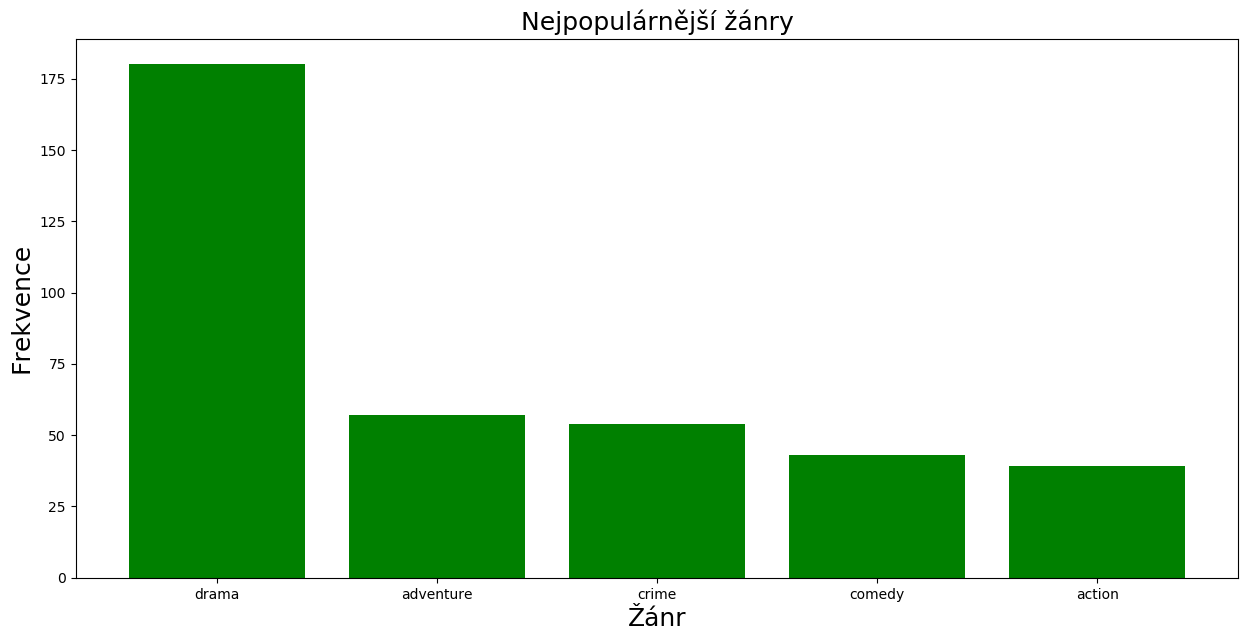

In [199]:
x = graf.loc[:,'Word'].values
y = graf.loc[:,'Frequency'].values
f, ax = plt.subplots(figsize=(15,7))
plt.bar(x, y, align='center', color='g')
plt.xlabel('Žánr', fontsize = 18)
plt.ylabel('Frekvence', fontsize = 18)
plt.title('Nejpopulárnější žánry', fontsize = 18)

# Nejpopulárnější státy

Text(0.5, 1.02, 'Frekvence filmů v různých státech')

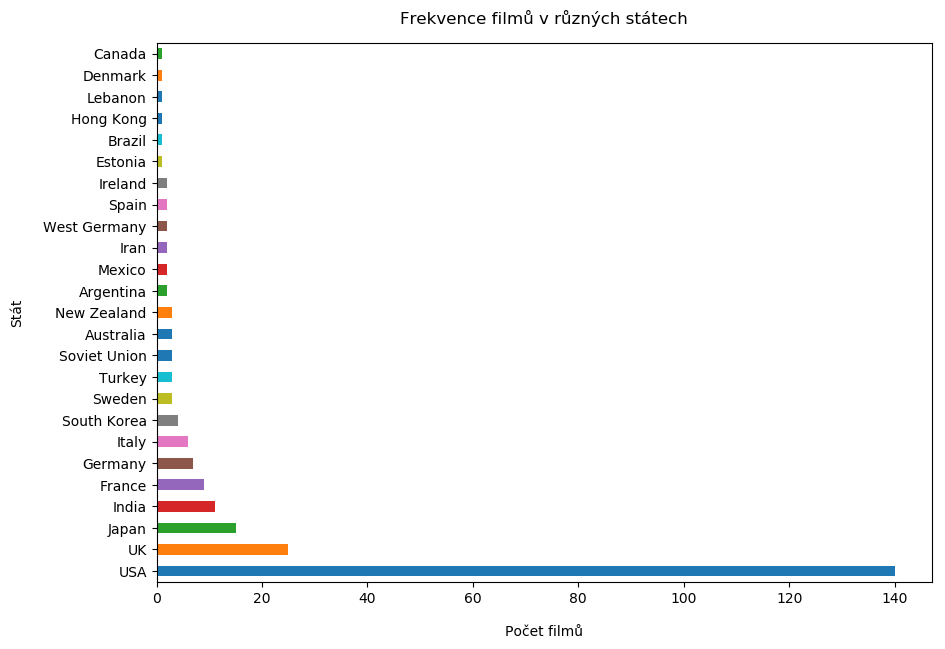

In [203]:
init_data.Country.value_counts().plot(kind='barh', figsize=(10, 7))
plt.xlabel("Počet filmů", labelpad=14)
plt.ylabel("Stát", labelpad=14)
plt.title("Frekvence filmů v různých státech", y=1.02)

# Directors

In [206]:
init_data.Director = init_data.Director.str.replace( r"([A-Z])", r" \1").str.strip()

Text(0.5, 1.02, 'Statistika filmových režisérů')

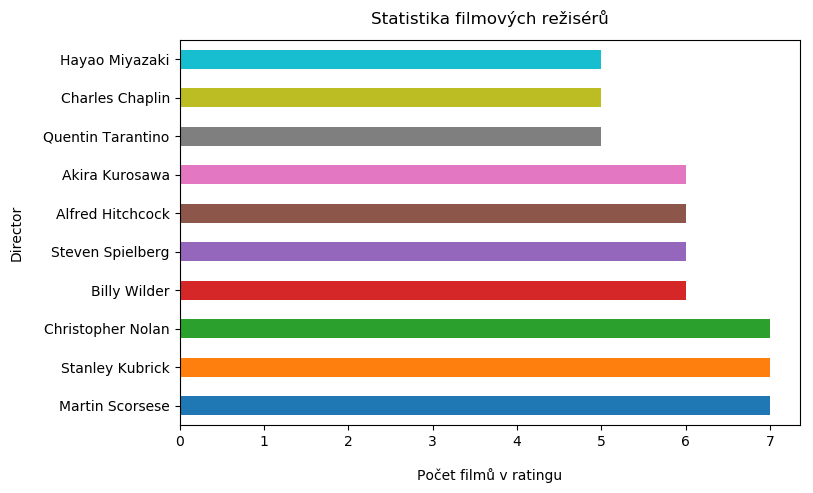

In [208]:
init_data.Director.value_counts()[:10].plot(kind='barh', figsize=(8, 5))
plt.xlabel("Počet filmů v ratingu", labelpad=14)
plt.ylabel("Director", labelpad=14)
plt.title("Statistika filmových režisérů", y=1.02)